In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Sounding info: (June 28, 2024 at 12 UTC at the OKX site, which is here in Upton, NY)
sounding_year = "24"
sounding_month = "06"
sounding_day = "28"
sounding_hour = "12"
sounding_site = "OKX"

# URL of the data file
# This will look like: "https://www.spc.noaa.gov/exper/soundings/24062812_OBS/OKX.txt"
url = "https://www.spc.noaa.gov/exper/soundings/" + sounding_year + sounding_month + sounding_day + sounding_hour + "_OBS/" + sounding_site + ".txt"

# Function to download and parse the data
def download_and_parse(url):
    # Flags to indicate when to start and stop reading
    start_marker = "%RAW%"
    end_marker = "%END%"
    reading_data = False

    # Download the data file
    response = urllib.request.urlopen(url)
    data = response.read().decode('utf-8')

    # Split the data into lines
    lines = data.splitlines()

    # Initialize lists to store columns
    LEVEL = []
    HGHT = []
    TEMP = []
    DWPT = []
    WDIR = []
    WSPD = []
    print(lines[2])

    # Process each line
    for line in lines:

        if line == start_marker:
            reading_data = True
            continue  # Skip processing the "%RAW%" line itself

        if reading_data:
            if line == end_marker:
                break  # Stop reading if we encounter "%END%"
            else:
                # Split the line into columns
                columns = line.split(',')

                # Convert columns to float where applicable
                level = float(columns[0].strip())
                hght = float(columns[1].strip())
                temp = float(columns[2].strip())
                dwpt = float(columns[3].strip())
                wdir = float(columns[4].strip())
                wspd = float(columns[5].strip())

                # Append to respective lists
                LEVEL.append(level)
                HGHT.append(hght)
                TEMP.append(temp)
                DWPT.append(dwpt)
                WDIR.append(wdir)
                WSPD.append(wspd)

    # Convert lists to numpy arrays
    LEVEL = np.array(LEVEL)
    HGHT = np.array(HGHT)
    TEMP = np.array(TEMP)
    DWPT = np.array(DWPT)
    WDIR = np.array(WDIR)
    WSPD = np.array(WSPD)

    return LEVEL, HGHT, TEMP, DWPT, WDIR, WSPD

# Download and parse the data
LEVEL, HGHT, TEMP, DWPT, WDIR, WSPD = download_and_parse(url)

# Print the first few elements of each array as a check
print("LEVEL:", LEVEL[:5])
print("HGHT:", HGHT[:5])
print("TEMP:", TEMP[:5])
print("DWPT:", DWPT[:5])
print("WDIR:", WDIR[:5])
print("WSPD:", WSPD[:5])



LEVEL: [1017. 1006. 1003. 1000.  998.]
HGHT: [ 20.   113.57 139.27 165.   181.96]
TEMP: [16.8  16.33 16.2  16.   15.85]
DWPT: [9.8  6.98 6.2  6.   5.85]
WDIR: [ 0.000e+00  3.550e+02 -9.999e+03  5.000e+00  5.000e+00]
WSPD: [    0.      14.01 -9999.      15.      15.  ]


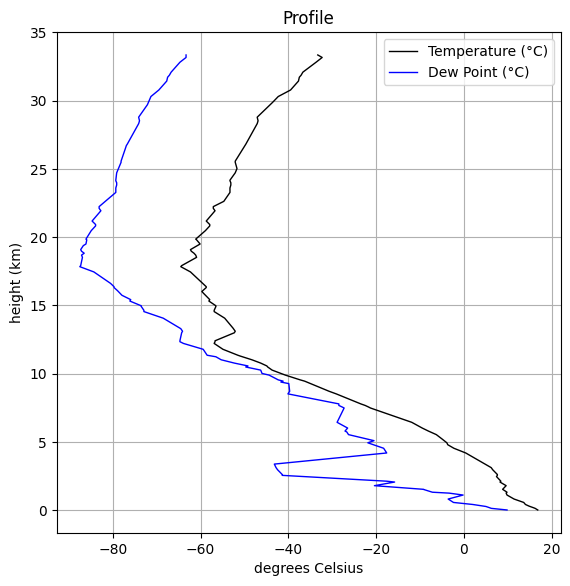

In [ ]:
plt.rcParams["figure.figsize"] = [6.50, 6.50]

plt.plot(TEMP,HGHT/1000,'k-',linewidth=1)
plt.plot(DWPT,HGHT/1000,'b-',linewidth=1)
plt.legend(['Temperature (°C)','Dew Point (°C)'])
plt.xlabel('degrees Celsius')
plt.ylabel('height (km)')
plt.title('Profile')
plt.grid(True)
#plt.savefig('Lab6_plot1.png')
plt.show()